In [2]:
import requests, json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Build data source statistics
data_sources = []
seasons = ['2016-17','2017-18','2018-19','2019-20','2020-21']
tables = ['merged_gw.csv','players_raw.csv']

In [ ]:
# Iterate through tables
# 2021-09-28: manually cleaned up 39 - 47 Game week numers in 2019-20 season file for data errors
for s in seasons:
    for t in tables:
        file_name = s+"_"+t
        df = pd.read_csv(file_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
        file_summary = [file_name, len(df),len(df.columns),",".join(col for col in df)]
        data_sources.append(file_summary)

In [ ]:
#Generate data columns
list_df = []
for ds in data_sources:
    columns = ds[3].split(",")
    columns.sort()
    columns.insert(0,ds[0])
    list_df.append(columns)
df1 = pd.DataFrame(list_df)

In [ ]:
df1.to_csv("data_columns.csv",index = False)

### EDA Collect Player Data

In [3]:
#read all players data and merge
df_p_all = pd.DataFrame(columns  = ['season','id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type'])
for s in seasons: 
    pf_name = s+"_"+"players_raw.csv"
    df_p = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_p = df_p[['id','chance_of_playing_next_round', 'chance_of_playing_this_round', 'element_type']]
    df_p['season'] = s
    print(df_p.shape)
    df_p_all = df_p_all.append(df_p,ignore_index=True)

(683, 5)
(647, 5)
(624, 5)
(666, 5)
(713, 5)


In [ ]:
df_p_all['chance_of_playing_this_round'].describe()

In [ ]:
df_p_all['chance_of_playing_this_round'].value_counts(normalize= True,sort = True) 

### EDA Group by Week-player and summary statistics

In [4]:
df_gw_all = pd.DataFrame(columns  = ['season','GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home'])
for s in seasons: 
    pf_name = s+"_"+"merged_gw.csv"
    df_gw = pd.read_csv(pf_name, header = 0,delimiter = ",",encoding = "ISO-8859-1")
    df_gw = df_gw[['GW', 'element', 'name', 'minutes', 'value', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'bonus', 'total_points', 'influence', 'creativity', 'threat', 'ict_index', 'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets', 'was_home']]
    df_gw['season'] = s
    print(df_gw.shape)
    df_gw_all = df_gw_all.append(df_gw,ignore_index=True)

(23679, 22)
(22467, 22)
(21790, 22)
(22560, 22)
(24365, 22)


In [8]:
a = np.array(df_gw_all['GW'])
np.unique(a)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38], dtype=object)

In [ ]:
df_gw_all.to_csv("df_gw_all.csv",index = False,encoding = "ISO-8859-1")

In [ ]:
df_gw_all[['influence', 'creativity', 'threat']].describe()

In [ ]:
df_gw_all['was_home'].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90]
df_gw_all['minutes_binned']= pd.cut(df_gw_all['minutes'],bins)
df_gw_all["minutes_binned"].value_counts(normalize= True,sort = False) 

In [ ]:
bins = [0,500,1000,5000,10000,50000,100000,5000000]
df_gw_all['selected_binned']= pd.cut(df_gw_all['selected'],bins)
df_gw_all["selected_binned"].value_counts(normalize= True,sort = False) 

### EDA Data visualization

In [ ]:
# value of players across seasons
# https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
value_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['value']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
value_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['value']]
value_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['value']]
value_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['value']]
value_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['value']]
values = [value_1617, value_1718, value_1819, value_1920,value_2021]
for value in values:
    value['value'] = value['value'].astype('float')
fig, ax = plt.subplots()
ax.boxplot([value_1617['value'],value_1718['value'],value_1819['value'],value_1920['value'],value_2021['value']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("value_boxplot.png") # must be before show
plt.show()

In [ ]:
# transfer-in & out across all seasons
transfer_all = df_gw_all[[ 'transfers_in', 'transfers_out']]
for c in transfer_all.columns:
    transfer_all[c] = transfer_all[c].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.scatter(transfer_all['transfers_in'], transfer_all['transfers_out'],s=2)
plt.xlabel('transfers_in')
plt.ylabel('transfers_out')
plt.savefig("transfer_scatter.png")
plt.show()

In [ ]:
# transfer balance of game week trades across seasons

tb_1617 = df_gw_all.loc[df_gw_all['season'] == '2016-17', ['transfers_balance']]
# value_1617 = value_1617.groupby('element')['value'].mean().reset_index()
tb_1718 = df_gw_all.loc[df_gw_all['season'] == '2017-18', ['transfers_balance']]
tb_1819 = df_gw_all.loc[df_gw_all['season'] == '2018-19', ['transfers_balance']]
tb_1920 = df_gw_all.loc[df_gw_all['season'] == '2019-20', ['transfers_balance']]
tb_2021 = df_gw_all.loc[df_gw_all['season'] == '2020-21', ['transfers_balance']]
tbs = [tb_1617, tb_1718, tb_1819, tb_1920,tb_2021]
for tb in tbs:
    tb['transfers_balance'] = tb['transfers_balance'].astype('int')
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
ax.boxplot([tb_1617['transfers_balance'],tb_1718['transfers_balance'],tb_1819['transfers_balance'],tb_1920['transfers_balance'],tb_2021['transfers_balance']])
plt.xticks([1, 2, 3, 4,5], ["2016-17", "2017-18", "2018-19", "2019-20","2020-21"], rotation=10)
plt.savefig("tb_boxplot.png") # must be before show
plt.show()

In [ ]:
# Total_points by game week across all seasons 
totalpoint_all = df_gw_all.loc[:,'total_points']
totalpoint_all.astype('int32').dtypes
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False,style='plain')
plt.xlim(-5, 30)
plt.hist(totalpoint_all)
plt.xlabel('Total points')
plt.ylabel('Frequency')
plt.savefig("totalpoints_hist.png")
plt.show() 

### Regression Model data Preparation

In [11]:
# df_p_all collect season and Player ID, df_gw_all collect season+gw+element data 
print(df_gw_all.shape,df_p_all.shape,df_gw_all.columns,df_p_all.columns)

(114861, 22) (3333, 5) Index(['season', 'GW', 'element', 'name', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home'],
      dtype='object') Index(['season', 'id', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'element_type'],
      dtype='object')


In [16]:
# join player data with gw data
df_all = pd.merge(df_gw_all, df_p_all,  how='left', left_on=['season','element'], right_on = ['season','id'])
df_all = df_all.drop(columns=['chance_of_playing_next_round','chance_of_playing_this_round','id'])

In [34]:
#Collect GW 2 - 38 data and add lastGW columns for joining
df_all_nextGW = df_all[['season','GW','element','total_points','minutes']]
df_all_nextGW = df_all_nextGW[df_all_nextGW['GW']>1]
df_all_nextGW['lastGW'] = df_all_nextGW['GW'] - 1
df_all_nextGW.rename(columns={'total_points':'total_points_NW','minutes':'minutes_NW'},inplace=True)
df_all_nextGW = df_all_nextGW[['season','lastGW','element','total_points_NW','minutes_NW']]

In [35]:
# merge NW points/minutes with GW data
df_all_nw = pd.merge(df_all, df_all_nextGW,  how='right', left_on=['season','element','GW'], right_on = ['season','element','lastGW'])
df_all_nw = df_all_nw.drop(columns=['lastGW'])

In [105]:
# create new columns to store historical  data, also dropped about 4000 rows of unmathed rows between this and last GW
df_all_nw['total_points_past'] = df_all_nw['total_points']
df_all_nw['minutes_past'] = df_all_nw['minutes']
df_all_nw = df_all_nw.dropna()

In [107]:
# build this function to calculate points & minutes of previous weeks in the season, not that for elment must use eq() or it will return 0 
def calculate_points(season,gw,player):
    df_temp = df_gw_all[(df_gw_all['season']==season) & (df_gw_all['GW'].astype(int)<int(gw)) & df_gw_all['element'].eq(int(player))][['total_points']]
    df_temp
    return df_temp['total_points'].sum()

def calculate_mins(season,gw,player):
    df_temp = df_gw_all[(df_gw_all['season']==season) & (df_gw_all['GW'].astype(int)<int(gw)) & df_gw_all['element'].eq(int(player))][['minutes']]
    df_temp
    return df_temp['minutes'].sum()

#calculate_points('2016-17',10,77) test with AZP, return 37, which is correct

In [108]:
#calculating total points an minutes from past. This will take a long time
for i in range(0, df_all_nw.shape[0]):
   # get row contents as series using iloc{] and index position of row
    rowSeries = df_all_nw.iloc[i]
    # collect gameweek,season,player data for functions
    season,gw,player = rowSeries[0],rowSeries[1],rowSeries[2]
    df_all_nw.at[i,'total_points_past'] = calculate_points(season,gw,player)
    df_all_nw.at[i,'minutes_past'] = calculate_mins(season,gw,player)

In [115]:
df_all_nw.to_csv("Regression_data.csv", index = False)

### Regression Model building

In [136]:
df_all_nw_model.columns

Index(['season', 'GW', 'element', 'name', 'minutes', 'value', 'selected',
       'transfers_balance', 'transfers_in', 'transfers_out', 'bonus',
       'total_points', 'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets',
       'was_home', 'element_type', 'lastGW', 'total_points_NW', 'minutes_NW',
       'total_points_past', 'minutes_past'],
      dtype='object')

In [125]:
"""
input variables: 
        'GW', 'minutes', 'value', 'selected', 'transfers_in', 'transfers_out', 'bonus','total_points', 
       'influence', 'creativity', 'threat', 'ict_index',
       'red_cards', 'yellow_cards', 'assists', 'goals_scored', 'clean_sheets','was_home', 'element_type',
       'total_points_past', 'minutes_past'
# output variables:
    total_points_NW
# filters: 
    1. season: seperate training, test, validation sets
    2. minutes_NW: filter out player-gw that does not played in the next round
    3. element_type: no goalkeepers
# drop variables:
    1. element
    2. name
'"""
df_all_nw.shape

(110541, 28)

In [126]:
# filter by minutes_NW and element_type. Shirnk to 37177 rows of data
df_all_nw_model = df_all_nw[(df_all_nw['minutes_NW'] >= 45) & (df_all_nw['element_type'] != 1)]

In [10]:
# import regression models
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import statsmodels.api as sm

In [150]:
"""
reference: https://searchengineland.com/heres-how-i-used-python-to-build-a-regression-model-using-an-e-commerce-dataset-326493
1. Reducing x variables with high p value: 'GW', 'minutes', 'selected', 'transfers_out', 'bonus', 'assists', 'goals_scored', 'clean_sheets','red_cards'
"""
Y = df_all_nw_model['total_points_NW']
X = df_all_nw_model[[ 'value', 'transfers_in','total_points', 'influence', 'creativity', 'threat', 'ict_index', 'yellow_cards','was_home', 'element_type','total_points_past', 'minutes_past']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [152]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 29741
Testing Data Count: 7436


In [153]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_points_NW   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     200.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:49:06   Log-Likelihood:                -75126.
No. Observations:               29741   AIC:                         1.503e+05
Df Residuals:                   29728   BIC:                         1.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4823      0.110     13.515      0.000       1.267       1.697
value                 0.0431      0.002     25.622      0.000       0.040       0.046
transfers_in       1.108e-06   3.21e-07      3.450      0.001    4.79e-07    1.74e-06
total_points          0.0348      0.009      3.711      0.000       0.016       0.053
influence             0.0702      0.038      1.851      0.064      -0.004       0.145
creativity            0.0808      0.038      2.137      0.033       0.007       0.155
threat                0.0814      0.038      2.159      0.031       0.008       0.155
ict_index            -0.7622      0.377     -2.021      0.043      -1.501      -0.023
yellow_cards         -0.1196      0.055     -2.181      0.029      -0.227      -0.012
was_home             -0.3067      0.035     -8.670      0.000      -0.376      -0.237
element_type         -0.2116      0.031     -6.823      0.000      -0.272      -0.151
total_points_past     0.0098      0.001      7.707      0.000       0.007       0.012
minutes_past         -0.0004    5.6e-05     -6.743      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     8837.738   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24545.214
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                       6.115   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

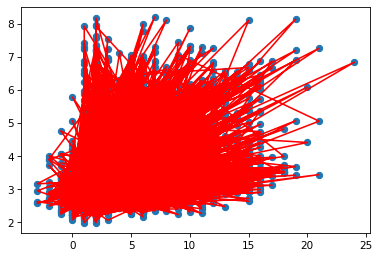

In [155]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_preds, color="red")
plt.show()

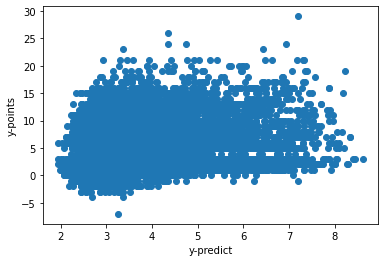

In [159]:
#https://www.analyticsvidhya.com/blog/2021/02/build-your-first-linear-regression-machine-learning-model/
linreg = linear_model.LinearRegression()
linreg.fit(X, Y)
y_pred = linreg.predict(X)
plt.scatter(y_pred, Y)
##plt.plot(y_pred, Y)
plt.xlabel('y-predict')
plt.ylabel('y-points')
plt.show()

In [161]:
# R-squared at 0.077
linreg.score(X, Y)

0.07695421362716914

### Polynomial Regression Building

In [6]:
df_all_nw= pd.read_csv("Regression_data.csv",header = 0,delimiter = ",",encoding = "ISO-8859-1")
# filter by minutes_NW and element_type. Shirnk to 37177 rows of data
df_all_nw_model = df_all_nw[(df_all_nw['minutes_NW'] >= 45) & (df_all_nw['element_type'] != 1)]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [[0.49, 0.18]]
#Edit: added second square bracket above to fix the ValueError problem

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print clf.predict(predict_)

,season,GW,element,name,minutes,value,selected,transfers_balance,transfers_in,transfers_out,...,assists,goals_scored,clean_sheets,was_home,element_type,lastGW,total_points_NW,minutes_NW,total_points_past,minutes_past
0,2016-17,1,454.0,Aaron_Cresswell,0,55,14023,0,0,0,...,0,0,0,False,2,1,0,0,0,0
1,2016-17,1,142.0,Aaron_Lennon,15,60,13918,0,0,0,...,0,0,0,True,3,1,0,0,0,0
2,2016-17,1,16.0,Aaron_Ramsey,60,80,163170,0,0,0,...,0,0,0,True,3,1,0,0,0,0
3,2016-17,1,482.0,Abdoulaye_DoucourÃ©,0,50,1051,0,0,0,...,0,0,0,False,3,1,1,7,0,0
4,2016-17,1,80.0,Abdul Rahman_Baba,0,55,1243,0,0,0,...,0,0,0,True,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110536,2020-21,37,483.0,Aaron Ramsdale,90,46,147543,8973,10262,1289,...,0,0,0,False,1,37,9,90,111,3240
110537,2020-21,37,220.0,Adrien Silva,0,44,16417,-24,0,24,...,0,0,0,False,3,37,0,0,0,0
110538,2020-21,37,676.0,Sidnei Tavares,0,44,294,12,34,22,...,0,0,0,False,3,37,0,0,3,84
110539,2020-21,37,204.0,Kalvin Phillips,45,49,73765,91,461,370,...,0,0,0,False,3,37,6,90,61,2293


In [8]:
Y = df_all_nw_model['total_points_NW']
X = df_all_nw_model[[ 'value', 'transfers_in','total_points', 'influence', 'creativity', 'threat', 'ict_index', 'yellow_cards','was_home', 'element_type','total_points_past', 'minutes_past','GW', 'minutes', 'selected', 'transfers_out', 'bonus', 'assists', 'goals_scored', 'clean_sheets','red_cards']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [14]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_predict = poly.fit_transform(X_test)
clf = linear_model.LinearRegression()
clf.fit(X_, y_train)
y_test_predict = clf.predict(X_test_predict)

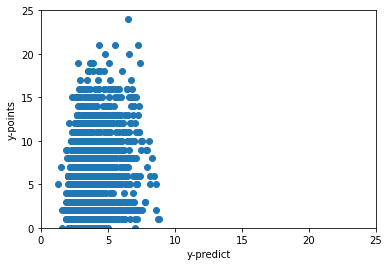

In [16]:
plt.scatter(y_test_predict, y_test)
##plt.plot(y_pred, Y)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel('y-predict')
plt.ylabel('y-points')
plt.show()

### Logistic Regression

In [ ]:
# function to aggregate play stats over the season
def agg_player(x):
        d = []
        d.append(x['GW'].nunique())
        d.append(x['total_points'].max())
        d.append(x['total_points'].min())
        d.append(x['total_points'].mean())
        d.append(x['total_points'].sum())
        d.append(x['minutes'].mean())
        d.append(x['minutes'].sum())
        d.append(x['value'].mean())
        return pd.Series(d, index= ['GW_participated', 'total_points_max','total_points_min','total_points_mean','total_points_sum','minutes_mean','minutes_sum','value_mean'])

In [ ]:
# EDA Group by player and count week
# Get data subset: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
print (df_1617['element'].nunique())
df_1617_p = df_1617.reset_index()[['name', 'element','bonus', 'loaned_in', 'loaned_out','minutes','opponent_team', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out','value', 'GW']]
df_1617_p_byname = df_1617_p.groupby(['element','name']).apply(agg_player).reset_index()

In [ ]:
df_1617_p[df_1617_p['element'] == 77]
# a['minutes_sum'].describe()

In [ ]:
### FPL API only contains detailed data for the current season and aggregate data for past seasons, so no use
### Reference: https://medium.com/analytics-vidhya/getting-started-with-fantasy-premier-league-data-56d3b9be8c32
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

# get player data from 'elements' field
players = r['elements']
events = r['events']
# show data for first player
pprint(events)

base_url = "https://fantasy.premierleague.com/api/"
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(base_url + 'element-summary/' + str(player_id) + '/').json()
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    return df

# show player #1's gameweek history
get_season_history(1)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head(10)